In [1]:
import os
import glob
import matplotlib.pyplot as plt
import re
import json 
import pandas as pd

#pytorch
import torch
from torch.utils.data import Dataset, DataLoader
import cv2

## Details of data
* patch label of an MSI type is 1.
* patch label of an MSS type is 0.


# Make a data.json file 
- expect MSS directory with MSS patches images 
- expect MSIMUT directory with MSI patches images

- change manually the path

In [75]:
# set patches directory
# path = os.path.abspath('./MSIMUT/')
path = os.path.abspath('./MSS/')
data_path = os.path.join(path,'*g')
files = glob.glob(data_path)

In [76]:
def build_patch_dict(file_name, is_MSI):
    patch_dict = {}
    file_name_list = file_name.split('-')
    patch_id, patient_id = file_name_list[1], file_name_list[2:5]
    patient_id = '-'.join(patient_id)
    patch_dict['img_name'] = file_name  
    patch_dict['patient_id'] = patient_id
    patch_dict['patch_id'] = patch_id
    patch_dict['label'] = is_MSI  
    return patch_dict

def get_file_name(file):
    delimiters = "\\", "."
    regexPattern = '|'.join(map(re.escape, delimiters))
    return re.split(regexPattern, file)[-2]
    

In [ ]:
patches_list = []
for file in files:
    file_name = get_file_name(file)
    patch_dict = build_patch_dict(file_name, is_MSI=0)
    print(patch_dict)
    patches_list.append(patch_dict)
    
    

In [78]:
# set data to save 
data = {'patches':patches_list}

In [79]:
# save the data
output_file = os.path.join(path, 'data.json')
with open(output_file, 'w') as outfile:
    json.dump(data, outfile)

# Load data.json file from dir

In [2]:
# laod MSI data 
MSI_dir = os.path.abspath('./MSIMUT/')
path_json_file = os.path.join(MSI_dir, 'data.json')
with open(path_json_file) as json_file:
    MSI_data = json.load(json_file)

In [3]:
# laod MSS data 
MSS_dir = os.path.abspath('./MSS/')
path_json_file = os.path.join(MSS_dir, 'data.json')
with open(path_json_file) as json_file:
    MSS_data = json.load(json_file)

In [4]:
MSI_patches_list = MSI_data['patches']
MSS_patches_list = MSS_data['patches']

In [5]:
MSI_df = pd.DataFrame(MSI_patches_list)
MSS_df = pd.DataFrame(MSS_patches_list)

In [6]:
MSI_df.columns

Index(['img_name', 'patient_id', 'patch_id', 'label'], dtype='object')

In [7]:
print(f"MSI patches number: {len(MSI_df)}")
print(f"MSS patches number: {len(MSS_df)}")

MSI patches number: 28335
MSS patches number: 70569


In [8]:
MSI_df

,img_name,patient_id,patch_id,label
0,blk-AAAFIYHTSVIE-TCGA-G4-6309-01Z-00-DX1,TCGA-G4-6309,AAAFIYHTSVIE,1
1,blk-AAAITPVFKGLV-TCGA-AZ-6601-01Z-00-DX1,TCGA-AZ-6601,AAAITPVFKGLV,1
2,blk-AAALIQFQLCHN-TCGA-CK-6747-01Z-00-DX1,TCGA-CK-6747,AAALIQFQLCHN,1
3,blk-AAAPDFFDHLSQ-TCGA-AZ-4615-01Z-00-DX1,TCGA-AZ-4615,AAAPDFFDHLSQ,1
4,blk-AAAPRACLYGDL-TCGA-AZ-4615-01Z-00-DX1,TCGA-AZ-4615,AAAPRACLYGDL,1
...,...,...,...,...
28330,blk-YYWTEYPVELYD-TCGA-D5-6530-01Z-00-DX1,TCGA-D5-6530,YYWTEYPVELYD,1
28331,blk-YYYGRRDYYWPI-TCGA-AY-6197-01Z-00-DX1,TCGA-AY-6197,YYYGRRDYYWPI,1
28332,blk-YYYIEENKPLGH-TCGA-CK-6747-01Z-00-DX1,TCGA-CK-6747,YYYIEENKPLGH,1
28333,blk-YYYNVIYSTFYF-TCGA-AY-6197-01Z-00-DX1,TCGA-AY-6197,YYYNVIYSTFYF,1


In [9]:
MSS_df

,img_name,patient_id,patch_id,label
0,blk-AAADNFVSTKEF-TCGA-DC-6682-01Z-00-DX1,TCGA-DC-6682,AAADNFVSTKEF,0
1,blk-AAADPEIDNRVQ-TCGA-CM-5868-01Z-00-DX1,TCGA-CM-5868,AAADPEIDNRVQ,0
2,blk-AAAFDSIYEAPC-TCGA-AY-A71X-01Z-00-DX1,TCGA-AY-A71X,AAAFDSIYEAPC,0
3,blk-AAAHVLHKARAN-TCGA-AY-A71X-01Z-00-DX1,TCGA-AY-A71X,AAAHVLHKARAN,0
4,blk-AAAIANVEVMQV-TCGA-DC-6683-01Z-00-DX1,TCGA-DC-6683,AAAIANVEVMQV,0
...,...,...,...,...
70564,blk-YYYQNFFCQMAT-TCGA-AY-A71X-01Z-00-DX1,TCGA-AY-A71X,YYYQNFFCQMAT,0
70565,blk-YYYRLVSSDSDW-TCGA-EI-6514-01Z-00-DX1,TCGA-EI-6514,YYYRLVSSDSDW,0
70566,blk-YYYTITTWRNGD-TCGA-F4-6460-01Z-00-DX1,TCGA-F4-6460,YYYTITTWRNGD,0
70567,blk-YYYVCAPMQNDQ-TCGA-NH-A50T-01Z-00-DX1,TCGA-NH-A50T,YYYVCAPMQNDQ,0


### - how many ids for each patient (for each WSI) 

In [10]:
MSI_df['patient_id'].value_counts()

TCGA-CM-4743    4064
TCGA-D5-6530    3105
TCGA-CK-6746    2438
TCGA-AY-6197    2090
TCGA-AZ-4615    2051
TCGA-AZ-6598    1788
TCGA-CK-6747    1765
TCGA-AZ-6601    1569
TCGA-DC-6154    1250
TCGA-AA-3966     854
TCGA-AD-6964     831
TCGA-G4-6586     730
TCGA-CK-4951     720
TCGA-A6-2686     681
TCGA-G4-6588     523
TCGA-AA-3950     508
TCGA-AD-A5EJ     507
TCGA-AG-A02N     490
TCGA-AA-3877     452
TCGA-AD-5900     361
TCGA-D5-6540     345
TCGA-WS-AB45     343
TCGA-AA-3833     303
TCGA-G4-6302     247
TCGA-G4-6309     240
TCGA-D5-6928      80
Name: patient_id, dtype: int64

In [11]:
MSS_df['patient_id'].value_counts()

TCGA-AY-A71X    3914
TCGA-DC-6681    3218
TCGA-F5-6810    2754
TCGA-F4-6460    2752
TCGA-DC-6683    2504
                ... 
TCGA-G4-6315     125
TCGA-CI-6624     123
TCGA-AG-3887     118
TCGA-AG-3726      35
TCGA-AG-3727      27
Name: patient_id, Length: 74, dtype: int64

## Dataset and DataLoader for MSI and MSS

In [111]:
# imports 
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA as KPCA


In [112]:
class MssMsiPatchesDataset(Dataset):
    def __init__(self, MSI_dir, MSS_dir, transform=None):
        path_json_file = os.path.join(MSI_dir, 'data.json')
        with open(path_json_file) as json_file:
            MSI_data = json.load(json_file)
        path_json_file = os.path.join(MSS_dir, 'data.json')
        with open(path_json_file) as json_file:
            MSS_data = json.load(json_file)
        self.MSI_dir = MSI_dir
        self.MSS_dir = MSS_dir
        self.MSI_patches = MSI_data['patches']
        self.MSS_patches = MSS_data['patches']
        self.transform = transform 
        
    def __len__(self):
        return len(self.MSI_patches)+len(self.MSS_patches)
         
    def __getitem__(self, index):
        if index < len(self.MSI_patches):
            img_path = os.path.join(self.MSI_dir, self.MSI_patches[index]['img_name'])+".png"
            y_label = torch.tensor(int(self.MSI_patches[index]['label']))
        else:
            img_path = os.path.join(self.MSS_dir, self.MSS_patches[index-len(self.MSI_patches)]['img_name'])+".png"
            y_label = torch.tensor(int(self.MSS_patches[index-len(self.MSI_patches)]['label']))
        
        image = cv2.imread(img_path)
        if self.transform:
            image = self.transform(image)
        return (image, y_label)
        
        

In [113]:
MSI_dir = os.path.abspath('./MSIMUT/')
MSS_dir = os.path.abspath('./MSS/')

transform = T.ToTensor()
dataset = MssMsiPatchesDataset(MSI_dir, MSS_dir, transform)
batch_size = 4
dataset_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

## import model inception_v3

In [2]:
from torchvision import models as models
model = models.inception_v3()

In [55]:
weights = torch.load('./model_hist_eq_0.pt', map_location=torch.device('cpu'))

In [100]:
weights['model_state'].keys()

odict_keys(['Conv2d_1a_3x3.conv.weight', 'Conv2d_1a_3x3.bn.weight', 'Conv2d_1a_3x3.bn.bias', 'Conv2d_1a_3x3.bn.running_mean', 'Conv2d_1a_3x3.bn.running_var', 'Conv2d_1a_3x3.bn.num_batches_tracked', 'Conv2d_2a_3x3.conv.weight', 'Conv2d_2a_3x3.bn.weight', 'Conv2d_2a_3x3.bn.bias', 'Conv2d_2a_3x3.bn.running_mean', 'Conv2d_2a_3x3.bn.running_var', 'Conv2d_2a_3x3.bn.num_batches_tracked', 'Conv2d_2b_3x3.conv.weight', 'Conv2d_2b_3x3.bn.weight', 'Conv2d_2b_3x3.bn.bias', 'Conv2d_2b_3x3.bn.running_mean', 'Conv2d_2b_3x3.bn.running_var', 'Conv2d_2b_3x3.bn.num_batches_tracked', 'Conv2d_3b_1x1.conv.weight', 'Conv2d_3b_1x1.bn.weight', 'Conv2d_3b_1x1.bn.bias', 'Conv2d_3b_1x1.bn.running_mean', 'Conv2d_3b_1x1.bn.running_var', 'Conv2d_3b_1x1.bn.num_batches_tracked', 'Conv2d_4a_3x3.conv.weight', 'Conv2d_4a_3x3.bn.weight', 'Conv2d_4a_3x3.bn.bias', 'Conv2d_4a_3x3.bn.running_mean', 'Conv2d_4a_3x3.bn.running_var', 'Conv2d_4a_3x3.bn.num_batches_tracked', 'Mixed_5b.branch1x1.conv.weight', 'Mixed_5b.branch1x1.bn.w

In [70]:
model.state_dict().keys()

odict_keys(['Conv2d_1a_3x3.conv.weight', 'Conv2d_1a_3x3.bn.weight', 'Conv2d_1a_3x3.bn.bias', 'Conv2d_1a_3x3.bn.running_mean', 'Conv2d_1a_3x3.bn.running_var', 'Conv2d_1a_3x3.bn.num_batches_tracked', 'Conv2d_2a_3x3.conv.weight', 'Conv2d_2a_3x3.bn.weight', 'Conv2d_2a_3x3.bn.bias', 'Conv2d_2a_3x3.bn.running_mean', 'Conv2d_2a_3x3.bn.running_var', 'Conv2d_2a_3x3.bn.num_batches_tracked', 'Conv2d_2b_3x3.conv.weight', 'Conv2d_2b_3x3.bn.weight', 'Conv2d_2b_3x3.bn.bias', 'Conv2d_2b_3x3.bn.running_mean', 'Conv2d_2b_3x3.bn.running_var', 'Conv2d_2b_3x3.bn.num_batches_tracked', 'Conv2d_3b_1x1.conv.weight', 'Conv2d_3b_1x1.bn.weight', 'Conv2d_3b_1x1.bn.bias', 'Conv2d_3b_1x1.bn.running_mean', 'Conv2d_3b_1x1.bn.running_var', 'Conv2d_3b_1x1.bn.num_batches_tracked', 'Conv2d_4a_3x3.conv.weight', 'Conv2d_4a_3x3.bn.weight', 'Conv2d_4a_3x3.bn.bias', 'Conv2d_4a_3x3.bn.running_mean', 'Conv2d_4a_3x3.bn.running_var', 'Conv2d_4a_3x3.bn.num_batches_tracked', 'Mixed_5b.branch1x1.conv.weight', 'Mixed_5b.branch1x1.bn.w

In [104]:
model.fc = nn.Linear(2048,100,bias=True)

In [105]:
model.load_state_dict(weights['model_state'])

<All keys matched successfully>

In [ ]:
model.features()

In [ ]:
# for Inception v3
dataset_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
# get feature vectors
feature_vector_all = torch.empty([0,49])
labels_all = torch.empty([0,1])
for i, data in enumerate(dataset_loader):
    images, labels = data
    labels = labels.unsqueeze(1)
    labels_all = torch.vstack((labels_all, labels))
    feature_map = model(images)
    max_pool_output = torch.max(feature_map,dim=1).values
    feature_vector = max_pool_output.view(-1,49)  
    feature_vector_all = torch.vstack((feature_vector_all, feature_vector))  
    print(feature_vector_all.size())
    print(labels_all.size())
#     # for debug
    if i == 1:
        break


In [ ]:
model.__dict__

In [156]:
images.size()

torch.Size([4, 3, 224, 224])

In [159]:
imagesss.size()

torch.Size([4, 768, 12, 12])

In [ ]:
imagesss = torch.clone(images)
for i,k in enumerate(model._modules.items()):
    print(i)
    imagesss = k[1](imagesss)
    
    

## import model VGG16

In [ ]:
model = models.vgg16()
# for VGG16
dataset_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)
# get feature vectors
feature_vector_all = torch.empty([0,49])
labels_all = torch.empty([0,1])
for i, data in enumerate(dataset_loader):
    images, labels = data
    img_to_show = images[0].detach().numpy().transpose(1, 2, 0)
    plt.imshow(img_to_show)
    labels = labels.unsqueeze(1)
    labels_all = torch.vstack((labels_all, labels))
    feature_map = model.features(images)
    max_pool_output = torch.max(feature_map,dim=1).values
    feature_vector = max_pool_output.view(-1,49)  
    feature_vector_all = torch.vstack((feature_vector_all, feature_vector))  
    print(feature_vector_all.size())
    print(labels_all.size())
#     # for debug
    if i == 200:
        break

In [31]:
print(len(feature_vector_all))
print(labels_all[:-4].size())

788
torch.Size([788, 1])


In [34]:
feature_vector_filename = f'feature_vector_random_{len(feature_vector_all)}.pt'
labels_filename = f'labels_random_{len(labels_all[:-4])}.pt'
torch.save(feature_vector_all, feature_vector_filename)
torch.save(labels_all[:-4], labels_filename)

In [6]:
feature_vector_filename = f'feature_vector_random_788.pt'
labels_filename = f'labels_random_788.pt'
x = torch.load(feature_vector_filename).detach().numpy()
y = torch.load(labels_filename).numpy()

In [19]:
#PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
PCADf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
PCADf['label'] = y

# KPCA 
kpca = KPCA(n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
kpcaComponents = kpca.fit_transform(x)
KPCADf = pd.DataFrame(data = kpcaComponents
             , columns = ['principal component 1', 'principal component 2'])
KPCADf['label'] = y

# KPCA 
kpca = KPCA(n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
kpcaComponents = kpca.fit_transform(x)
KPCADf = pd.DataFrame(data = kpcaComponents
             , columns = ['principal component 1', 'principal component 2'])
KPCADf['label'] = y


In [38]:
MSE_list = []
for i in range(1,50):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    pca_inverse = pca.inverse_transform(principalComponents)
    pca_MSE = np.mean((x-pca_inverse)**2)
    print(pca_MSE)
    MSE_list.append(pca_MSE)

1.1326718
1.0103271
0.8976179
0.8120478
0.7314951
0.6626135
0.6023894
0.54569405
0.5012984
0.45877334
0.41718897
0.38576016
0.35506034
0.3286698
0.30367517
0.28033668
0.2594719
0.24096617
0.22351287
0.2068006
0.1908556
0.17671983
0.16266406
0.14944547
0.13764578
0.12651956
0.116217814
0.10688189
0.09793354
0.0895091
0.08161593
0.07416383
0.06707252
0.060646854
0.054512113
0.048534963
0.043066986
0.037703615
0.032749288
0.028155679
0.02388732
0.019856911
0.016172484
0.012769682
0.009464258
0.006436378
0.0039700125
0.0018745839
1.2224512e-12


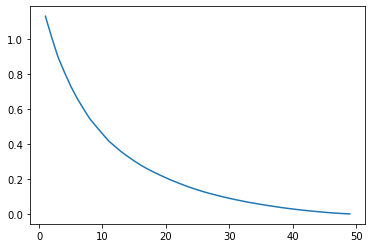

In [31]:
plt.figure()
plt.plot(range(1,50), MSE_list)   
plt.show()

In [28]:
pca2_MSE

1.0103271

In [26]:
import numpy as np
np.mean(np.array([[1,2],[3,4]]))

2.5

In [8]:
PCADf['label'].value_counts()

0.0    567
1.0    221
Name: label, dtype: int64

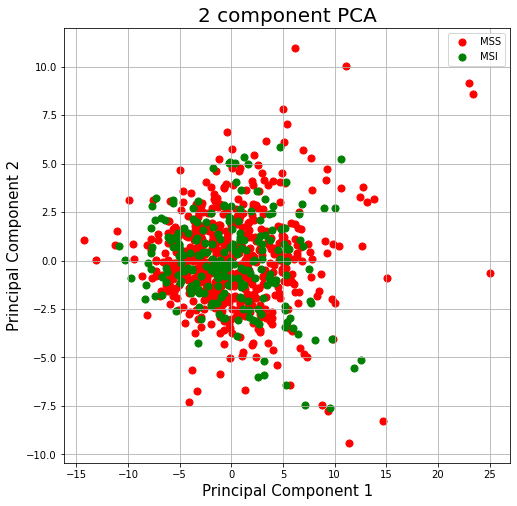

In [39]:
def plot_2D_MSI_MSS_decomposition(decompDf, decompType):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(f'2 component {decompType}', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = decompDf['label'] == target
        ax.scatter(decompDf.loc[indicesToKeep, 'principal component 1']
                   , decompDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(["MSS", "MSI"])
    ax.grid()
plot_2D_MSI_MSS_decomposition(PCADf, "PCA")

In [41]:
from sklearn.cluster import KMeans

In [42]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)

In [44]:
kmeans.cluster_centers_.shape

(2, 49)

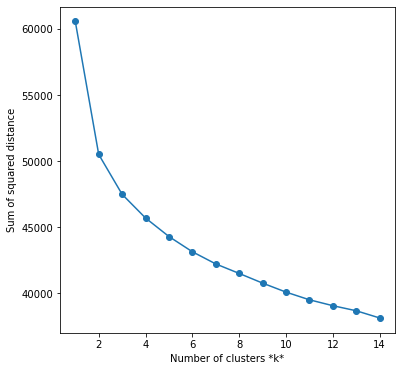

In [48]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(principalComponents)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

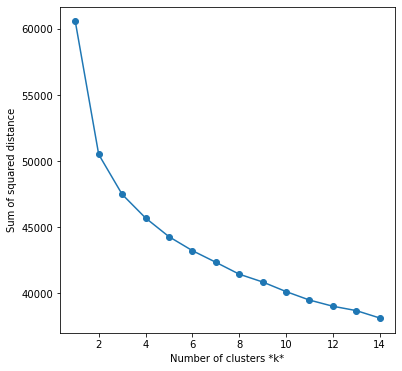

In [47]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 15))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

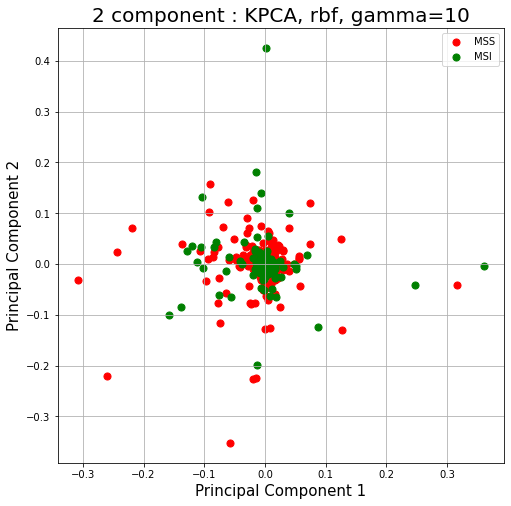

In [50]:
# KPCA-rbf, gamma=10
kpca = KPCA(n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
kpcaComponents = kpca.fit_transform(x)
KPCADf = pd.DataFrame(data = kpcaComponents
             , columns = ['principal component 1', 'principal component 2'])
KPCADf['label'] = y
plot_2D_MSI_MSS_decomposition(KPCADf, ": KPCA, rbf, gamma=10")

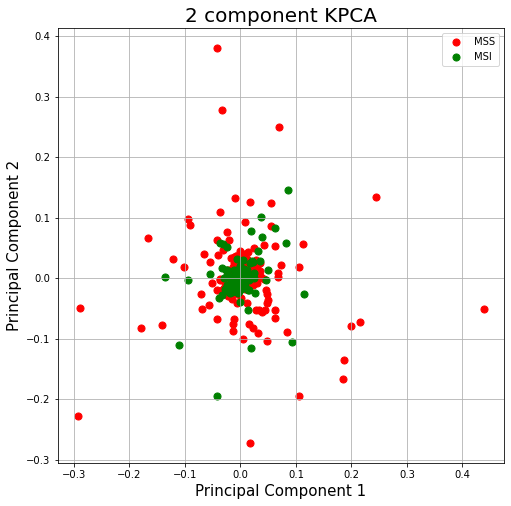

In [11]:
# KPCA-rbf, gamma=50
kpca = KPCA(n_components=2, kernel="rbf", gamma=50, fit_inverse_transform=True, alpha=0.1)
kpcaComponents = kpca.fit_transform(x)
KPCADf = pd.DataFrame(data = kpcaComponents
             , columns = ['principal component 1', 'principal component 2'])
KPCADf['label'] = y
plot_2D_MSI_MSS_decomposition(KPCADf, "KPCA")

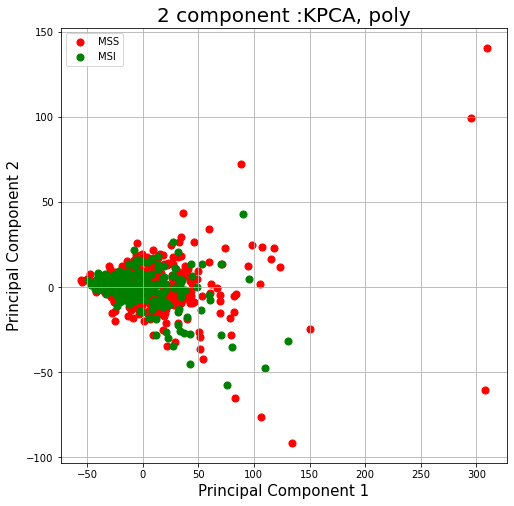

In [51]:
# KPCA-poly
kpca = KPCA(n_components=2, kernel="poly")
kpcaComponents = kpca.fit_transform(x)
KPCADf = pd.DataFrame(data = kpcaComponents
             , columns = ['principal component 1', 'principal component 2'])
KPCADf['label'] = y
plot_2D_MSI_MSS_decomposition(KPCADf, ":KPCA, poly")

In [153]:
feature_map = model.features(images)
print(feature_map.size())
max_pool_output = torch.max(feature_map,dim=1).values
print(max_pool_output.size())
feature_vector = max_pool_output.view(-1,49)
print(feature_vector.size())

torch.Size([4, 512, 7, 7])
torch.Size([4, 7, 7])
torch.Size([4, 49])
